In [2]:
# 데이터프레임 패키지
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]
# 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
print(len(bream_length),len(bream_weight))

35 35


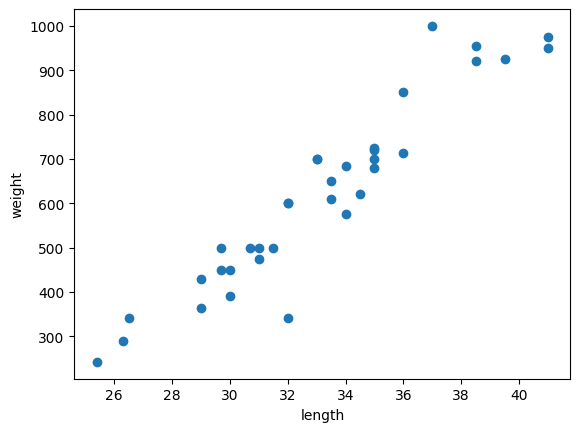

In [4]:
# 시각적으로 데이터 분포 확인
# 산점도
plt.scatter(bream_length,bream_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 해석
# 도미의 길이가 길수록 무게가 커진다
# 산점도의 분포가 일직선에 가까운 형태로 나타나고 있다(선형관계)
# 선형(linear)

In [5]:
#빙어 길이 / cm
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
#빙어 무게 /g
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

print(len(smelt_length),len(smelt_weight))

14 14


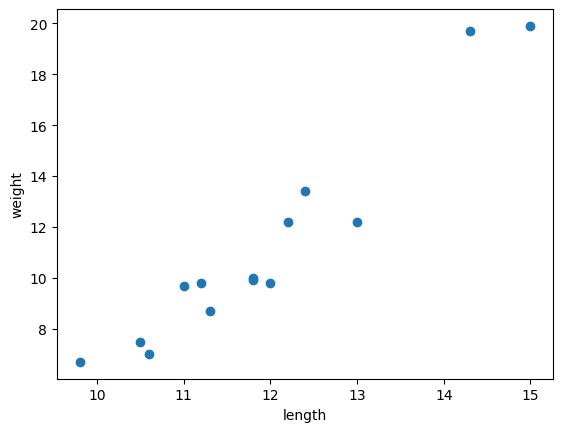

In [6]:
# 시각적으로 데이터 분포 확인
# 산점도
plt.scatter(smelt_length,smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

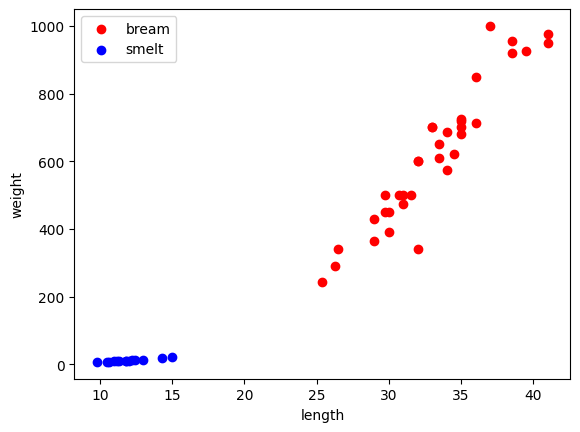

In [11]:
# 도미와 빙어 데이터의 산점도를 하나의 그래프에서 확인할 수 있도록 그려라
plt.scatter(bream_length,bream_weight,color="r",label="bream")
plt.scatter(smelt_length,smelt_weight,color="b",label="smelt")
plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.show()

In [20]:
# 데이터 합치기
# 도미와 빙어의 길이 데이터 합치기
# 도미와 빙어의 무게 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [24]:
# 머신러닝의 사이킷런 라이브러리사용
# 머신러닝에서 훈련에 사용되는 데이터형태는 2차원
# 따라서 길이와 무게 데이터를 2차원으로 만들어야함
# [[길이, 무게],[길이, 무게]..] 형태의 2차원 리스트
# 변수명 : fish_data (훈련데이터(train data) : 독립변수 데이터)
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [26]:
# 지도학습을 위해 정답 만들기
# 도미와 빙어, 둘 중 하나 선택 -> 이진분류 값을 사용(1 또는 0)
# 도미 : 1, 빙어 : 0
# 타겟데이터(target data) : 정답 데이터 -> 1차원으로 사용해야한다 / 결정값

# 1차원 종속데이터(target data) 만들기
# 변수명 : fish_target
fish_target = [1]*len(bream_length) + [0]*len(smelt_length)
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
# 모델 훈련 절차
# 0. 훈련데이터와 테스트데이터 생성
# 1. 모델 생성
# 2. 모델 훈련 : fit()
# 3. 훈련모델 성능 확인 : score 확인
# 4. 임의 데이터로 테스트(예측/분류) : predict()

# KNN(최근접이웃) 알고리즘
# 사용할 라이브러리
from sklearn.neighbors import KNeighborsClassifier

# 클래스 모델 객체 생성
# 훈련모델생성
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [30]:
# 모델 학습(훈련/train) : train 데이터 사용(독립데이터)
# 지도학습 할 경우-> 문제와 답을 넘겨줄 경우
# 독립데이터와 정답데이터를 같이 넣어준다
kn.fit(fish_data,fish_target)

KNeighborsClassifier()

In [31]:
# 훈련을 잘 했는지 정확도 확인하기(모델 평가)
# 정확도는 1보다 작은것이 좋다
# 정확도 1이 훈련모델에 과대적합이 일어났다고 본다
kn.score(fish_data,fish_target)

1.0

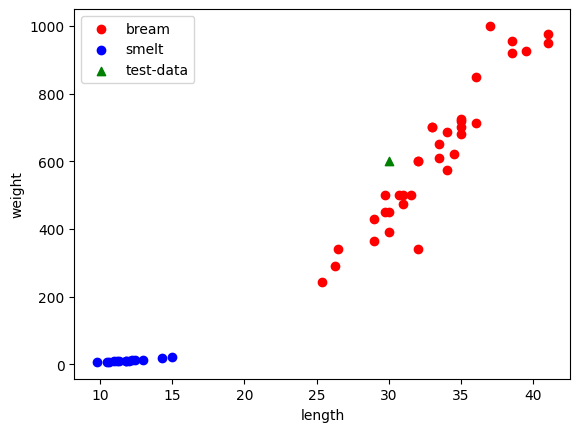

In [33]:
# 도미와 빙어 데이터의 산점도를 하나의 그래프에서 확인할 수 있도록 그려라
plt.scatter(bream_length,bream_weight,color="r",label="bream")
plt.scatter(smelt_length,smelt_weight,color="b",label="smelt")

# 임의 값(테스트 데이터)
plt.scatter(30,600,marker="^",color="g",label="test-data")

plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.show()

In [35]:
# 훈련모델 이용해 예측 : predict()
# 예측 데이터도 2차원으로 넣어주어야 한다 / 훈련데이터 차원과 동일
# 예측 시 target data는 없어도 된다
kn.predict([[30,600]])

array([1])

In [37]:
# KNN(최근접 이웃 알고리즘)
# 가장 가까운 거리의 데이터 값을 찾아 분류하는 모델
# 가장 가까운 거리 데이터 몇개를 기준으로?
# 가장 가까운 데이터 추출 -> 추출한 데이터의 소속확인 -> 비율로 많은 쪽이 정답
# 기본 5개 데이터 추출 : n-neighbors 속성 사용
# 모델에 적용하는 속성변수 : 하이퍼파라미터(사람이 직접 값을 지정하는 변수)

# 새로운 데이터와 가장 근접한 20개 데이터 추출
# 추출된 20개를 0과 1로 구분해 어느쪽의 숫자가 더많은지 확인
# 많은 쪽의 값을 최종 예측값으로 알려줌
kn49 = KNeighborsClassifier(n_neighbors=20)
kn49

KNeighborsClassifier(n_neighbors=20)

In [38]:
# 훈련시키고 정확도 확인
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

0.9795918367346939

In [39]:
kn.predict([[30,600]])

array([1])

In [45]:
# 하이퍼파라미터 값을 바꿔가면서 훈련정확도 향상시키는 작업
# 하이퍼파라미터 튜닝
# 최적의 n_neighbos 개수 찾기
score=[]
for i in range(1,len(fish_data)+1,2):
    kn_test = KNeighborsClassifier(n_neighbors=i)
    kn_test.fit(fish_data,fish_target)
    #score.append(kn_test.score(fish_data,fish_target))
    if kn_test.score(fish_data,fish_target) < 1:
        print(i)
        print(kn_test.score(fish_data,fish_target))
        break
                     
    


19
0.9795918367346939


In [46]:
# 최종 모델 생성
kn = KNeighborsClassifier(n_neighbors=19)
kn.fit(fish_data,fish_target)
kn.predict([[30,600]])

array([1])